# Adult Census Income dataset

The dataset named Adult Census Income is available in kaggle and UCI repository. This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).

**The prediction task is to determine whether a person makes over $50K a year or not.**

The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types. The complete list of variables is as follows:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K[](http://)

### Import libraries

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
%config Completer.use_jedi = False

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Speed EDA
#from pandas_profiling import ProfileReport

### Import dataset

In [2]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Exploratory data analysis with Pandas

Let’s have a look at data dimensionality, feature names, and feature types

In [3]:
print(df.shape)

(32561, 15)


From the output, we can see that the table contains 32561 rows and 15 columns.



Now let's try printing out column names using columns:

In [4]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


We can use the info() method to output some general information about the dataframe:

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Let's see statistics on non-numerical features.

In [7]:
df.describe(include=['object'])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Let's check the repartition between male and female

In [8]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

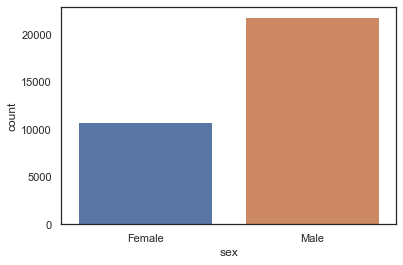

In [9]:
sns.countplot(x="sex", data=df)

Let's check the race's repartition

In [10]:
df.race.value_counts()


White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

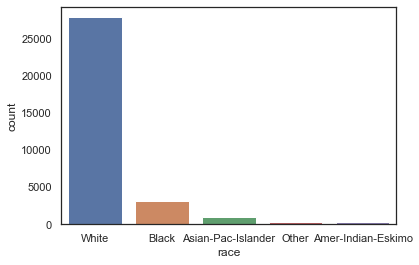

In [11]:
sns.countplot(x="race", data=df)

#### Reformating the target columns

In [12]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head(4)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


*Let's have a look at our target*

In [13]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

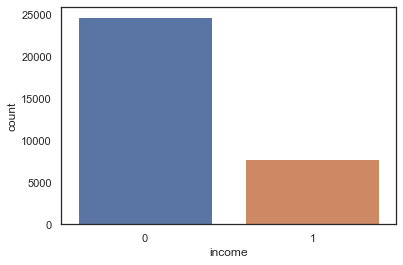

In [14]:
sns.countplot(x="income", data=df)

We have 24720 people with incomes below 50k and 7841 with incomes above 50k

In [15]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

#### Analyzing numerical features

Age 

<AxesSubplot:ylabel='Frequency'>

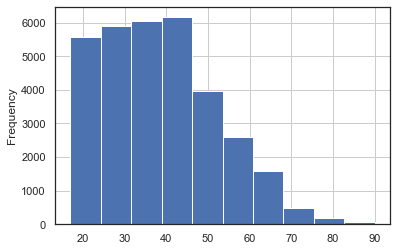

In [16]:

df.age.plot.hist(grid=True)

<AxesSubplot:ylabel='Frequency'>

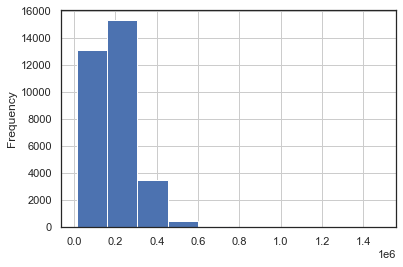

In [17]:
df.fnlwgt.plot.hist(grid=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education.num'}>],
       [<AxesSubplot:title={'center':'capital.gain'}>,
        <AxesSubplot:title={'center':'capital.loss'}>,
        <AxesSubplot:title={'center':'hours.per.week'}>],
       [<AxesSubplot:title={'center':'income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

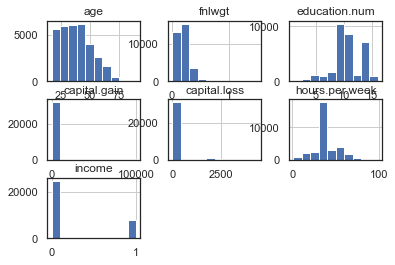

In [18]:
df[numeric_features].hist()

#### Correlation

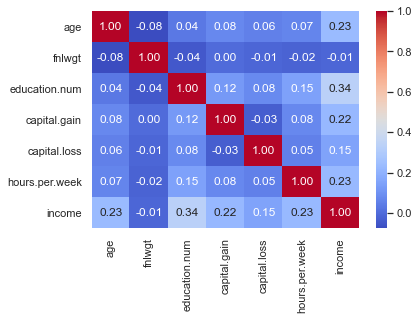

In [19]:
cor_mat = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [20]:
df['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

<AxesSubplot:xlabel='education.num', ylabel='count'>

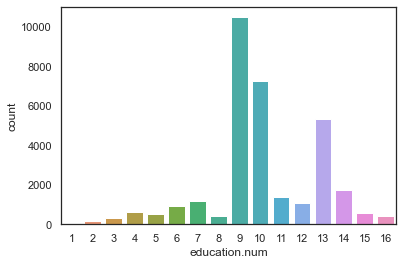

In [21]:
sns.countplot(x="education.num", data=df)

Let's have a look at the income according to the gender

<AxesSubplot:xlabel='sex', ylabel='count'>

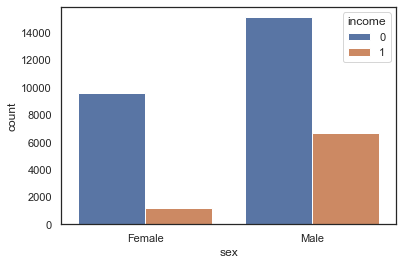

In [22]:
 sns.countplot(x="sex", hue="income", data=df)

#### Exploring Education Num vs Income

/Users/nathanamar/opt/anaconda3/envs/mlproject_perso/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nathanamar/opt/anaconda3/envs/mlproject_perso/lib/python3.9/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


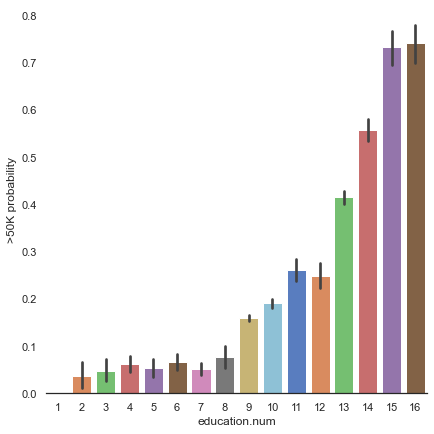

In [23]:
ed_inc= sns.factorplot(x="education.num",y="income",data=df,kind="bar",size = 6,palette = "muted")
ed_inc.despine(left=True)
ed_inc = ed_inc.set_ylabels(">50K probability")

#### Exploring Hours Per Week vs Income


/Users/nathanamar/opt/anaconda3/envs/mlproject_perso/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nathanamar/opt/anaconda3/envs/mlproject_perso/lib/python3.9/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


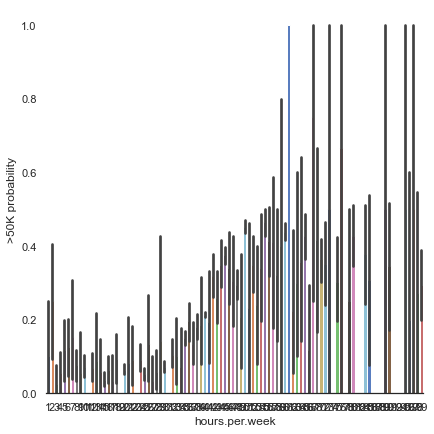

In [24]:
hour_inc  = sns.factorplot(x="hours.per.week",y="income",data=df,kind="bar",size = 6,palette = "muted")
hour_inc.despine(left=True)
hour_inc = hour_inc.set_ylabels(">50K probability")

#### Exploring Relationship vs Income

/Users/nathanamar/opt/anaconda3/envs/mlproject_perso/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nathanamar/opt/anaconda3/envs/mlproject_perso/lib/python3.9/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


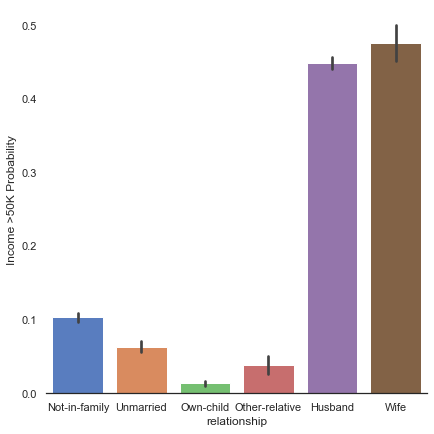

In [25]:
rel_inc= sns.factorplot(x="relationship",y="income",data=df,kind="bar", size = 6 ,
palette = "muted")
rel_inc.despine(left=True)
rel_inc = rel_inc.set_ylabels("Income >50K Probability")



#### Checking missing values

In [26]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [27]:
# Fill Missing Category Entries
df["workclass"] = df["workclass"].fillna("X")
df["occupation"] = df["occupation"].fillna("X")
df["native.country"] = df["native.country"].fillna("United-States")

# Confirm All Missing Data is Handled
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Taking a glance at the data provided, we can see that there are some special characters in the data like ‘?’. So, let’s get the count of special characters present in the data.

In [28]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

## Feature engineering

In [29]:
# code will replace the special character to nan and then drop the columns 
df['native.country'] = df['native.country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)


In [30]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

We will make a copy of the dataset in order to deal with this issue

In [31]:
print(df.shape)

(32561, 15)


In [32]:
df_new = df.copy()

In [33]:
#dropping the NaN rows now 
df_new.dropna(how='any',inplace=True)

In [34]:
print(df_new.shape)

(30162, 15)


Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. Some of the data provided are Categorical data like WorkClass, Education, Marital-Status, Occupation, Relationship, etc. we need to convert these into numerical notations.
Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.


**value_counts for categorical features**

In [35]:
for c in df_new[cat_features]:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- workclass ---
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
---- education ---
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
---- marital.status ---
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
---- occupation ---
Prof-specialty       4140
Craft-repair        

Here we ran a for loop over all the columns using the .value_counts() function of Pandas which gets us the count of unique values. We can see that some of the data provided are unique like the ‘workclass’ attribute which has only 7 distinct values and some columns have a lot of distinct values.

*Printing the number of uniques values in each categories*

In [36]:
for i in df_new:
    print ("---- %s ---" % i)
    print (df[i].nunique())

---- age ---
73
---- workclass ---
8
---- fnlwgt ---
21648
---- education ---
16
---- education.num ---
16
---- marital.status ---
7
---- occupation ---
14
---- relationship ---
6
---- race ---
5
---- sex ---
2
---- capital.gain ---
119
---- capital.loss ---
92
---- hours.per.week ---
94
---- native.country ---
41
---- income ---
2


In [37]:
#dropping based on uniquness of data from the dataset 
df_new.drop(['age', 'fnlwgt', 'capital.gain','capital.loss', 'native.country','education.num'], axis=1, inplace=True)

Printing the new columns

In [38]:
list(df_new.columns)

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'hours.per.week',
 'income']

In [39]:
df_new.shape

(30162, 9)

In [40]:
df_new.dtypes

workclass         object
education         object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
hours.per.week     int64
income             int64
dtype: object

### Handling categorical features

We have a lot of different ways to handle this kind of issue. Let's use the map function, we can convert all the other categorical data in the dataset to numerical data.


In [41]:
#gender
df_new['sex'] = df_new['sex'].map({'Male': 0, 'Female': 1}).astype(int)
df_new['race'] = df_new['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
df_new['marital.status'] = df_new['marital.status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
df_new['workclass']= df_new['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
df_new['relationship'] = df_new['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)
df_new['education']= df_new['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
df_new['occupation'] = df_new['occupation'].map({ 'Farming-fishing': 0, 'Tech-support': 1, 'Adm-clerical': 2, 'Handlers-cleaners': 3, 
 'Prof-specialty': 4,'Machine-op-inspct': 5, 'Exec-managerial': 6,'Priv-house-serv': 7,'Craft-repair': 8,'Sales': 9, 'Transport-moving': 10, 'Armed-Forces': 11, 'Other-service': 12,'Protective-serv':13}).astype(int)



In [42]:
df_new.race.value_counts()

3    25933
0     2817
1      895
4      286
2      231
Name: race, dtype: int64

In [43]:
df_new.sex.value_counts()

0    20380
1     9782
Name: sex, dtype: int64

In [44]:
df_new['marital.status'].value_counts()

2    14065
5     9726
4     4214
3      939
1      827
0      370
6       21
Name: marital.status, dtype: int64

In [45]:
df_new['workclass'].value_counts()

5    22286
6     2499
4     2067
1     1279
0     1074
2      943
3       14
Name: workclass, dtype: int64

In [46]:
df_new['education'].value_counts()

3     9840
0     6678
12    5044
4     1627
14    1307
11    1048
9     1008
13     820
6      557
7      542
15     455
5      377
10     375
2      288
8      151
1       45
Name: education, dtype: int64

In [47]:
df_new['occupation'].value_counts()

4     4038
8     4030
6     3992
2     3721
9     3584
12    3212
5     1966
10    1572
3     1350
0      989
1      912
13     644
7      143
11       9
Name: occupation, dtype: int64

In [48]:
df_new['relationship'].value_counts()

4    12463
0     7726
5     4466
3     3212
1     1406
2      889
Name: relationship, dtype: int64

In [49]:
df_new.dtypes

workclass         int64
education         int64
marital.status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
hours.per.week    int64
income            int64
dtype: object

We have handled all categorical variables

### The new dataframe look like this

In [50]:
df_new.head(10)

,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,income
1,5,3,1,6,0,3,1,18,0
3,5,6,4,5,3,3,1,40,0
4,5,0,3,4,5,3,1,40,0
5,5,3,4,12,3,3,1,45,0
6,5,13,3,2,3,3,0,40,0
7,1,10,5,4,2,3,1,20,1
8,2,3,4,4,0,3,1,40,0
10,5,10,4,4,3,0,1,35,1
11,6,7,5,4,0,3,0,45,1
12,5,12,1,12,0,3,1,20,1


Now that we have just continuous variables we can analyze the correlation between them

<AxesSubplot:xlabel='education'>

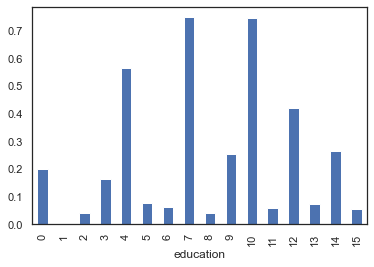

In [51]:
#plotting a bar graph for Education against Income to see the co-relation between these columns 
df_new.groupby('education').income.mean().plot(kind='bar')


Adults with an educational background of Prof-school (7) and Doctorate (10) will have a better income and it is likely possible that their income is higher than 50K.

<AxesSubplot:xlabel='occupation'>

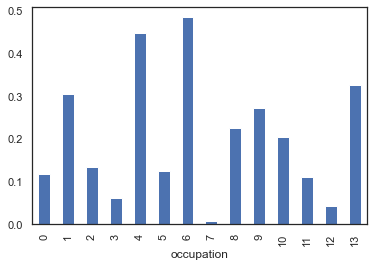

In [52]:
df_new.groupby('occupation').income.mean().plot(kind='bar')

Our data suggest that people with occupation Prof-specialty (5) and Exec-managerial (7) will have a better chance of earning an income of more than 50K.

<AxesSubplot:xlabel='sex'>

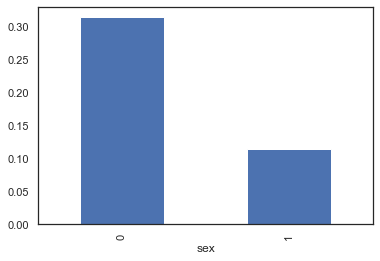

In [53]:
df_new.groupby('sex').income.mean().plot(kind='bar')

The gender bar chart provides us some useful insight into the data that Men (0) are more likely to have a higher income.

<AxesSubplot:xlabel='relationship'>

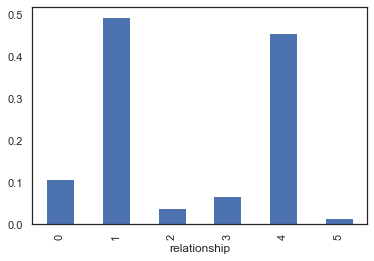

In [54]:
df_new.groupby('relationship').income.mean().plot(kind='bar')

relationship chart shows us that wife (1) and husband (4) has a higher income. A married couple would most likely earn >50K.

<AxesSubplot:xlabel='race'>

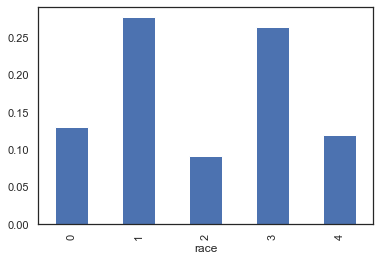

In [55]:
df_new.groupby('race').income.mean().plot(kind='bar')

As per the data, an Asian-Pac-Islander (1) or a white (3) have more chances of earning more than 50K.


<AxesSubplot:xlabel='workclass'>

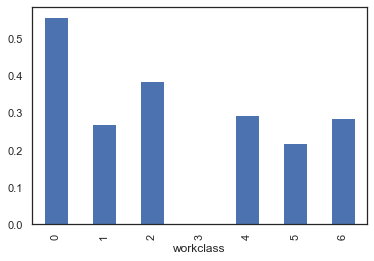

In [56]:
df_new.groupby('workclass').income.mean().plot(kind='bar')

Self-emp-in (0), Federal-gov(2) workclass groups have a higher chance of earning more than 50K.

## Train test split

In [57]:
df_new.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'hours.per.week', 'income'],
      dtype='object')

In [58]:
X = df_new.drop('income',axis=1)
y = df_new.income

In [59]:
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (30162, 8)
y shape :  (30162,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)

In [61]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("===============================")
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (20208, 8)
X_test shape :  (9954, 8)
y_train shape :  (20208,)
y_test shape :  (9954,)


In [62]:
y_train.value_counts()

0    15208
1     5000
Name: income, dtype: int64

In [63]:
y_test.value_counts()

0    7446
1    2508
Name: income, dtype: int64

## Model Selection

### Logistic Regression

Logistic Regression is one of the easiest and most commonly used supervised Machine learning algorithms for categorical classification. The basic fundamental concepts of Logistic Regression are easy to understand and can be used as a baseline algorithm for any binary (0 or 1) classification problem.

In [64]:
log_reg = LogisticRegression()
#Train our model with the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [65]:
#print our price predictions on our test data
pred_log = log_reg.predict(X_test)

In [66]:
accuracy_log_reg = metrics.accuracy_score(y_test, pred_log)

In [67]:
print(f"The accuracy of the model is {round(metrics.accuracy_score(y_test,pred_log),3)*100} %")

The accuracy of the model is 76.3 %


In [68]:
auc_log = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
print(f"The AUC Score  is {round(auc_log,3)*100} %")


The AUC Score  is 79.7 %


### Naive Bayes

A naive Bayes classifier assumes that the presence (or absence) of a particular feature of a class is unrelated to the presence (or absence) of any other feature, given the class variable. Basically, it’s “naive” because it makes assumptions that may or may not turn out to be correct.


In [69]:
model = GaussianNB()

# Train the model using the training sets
gnb = model.fit(X_train,y_train)
predictions = gnb.predict(X_test)

In [70]:
accuracy_log_naive_bayes = metrics.accuracy_score(y_test, predictions)

In [71]:
#printing the accuracy values 
print(f"The accuracy of the model is {round(metrics.accuracy_score(y_test,predictions),3)*100} %")



The accuracy of the model is 72.39999999999999 %


In [72]:
auc_nb = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print(f"The AUC Score  is {round(auc_nb,3)*100} %")



The AUC Score  is 79.5 %


### Decision Tree

A decision tree is a branched flowchart showing multiple pathways for potential decisions and outcomes. The tree starts with what is called a decision node, which signifies that a decision must be made. From the decision node, a branch is created for each of the alternative choices under consideration.

In [73]:
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=8,max_depth=10)

In [74]:
# Train Decision Tree Classifer
clf.fit(X_train,y_train)
prediction_clf = clf.predict(X_test)

In [75]:
accuracy_dec_tree = metrics.accuracy_score(y_test, prediction_clf)

In [76]:
print(f"The accuracy of the model is {round(metrics.accuracy_score(y_test,prediction_clf),3)*100} %")


The accuracy of the model is 80.9 %


In [77]:
auc_clf = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print(f"The AUC Score  is {round(auc_clf,3)*100} %")



The AUC Score  is 84.5 %


### Random Forest


Random Forests are a combination of tree predictors where each tree depends on the values of a random vector sampled independently with the same distribution for all trees in the forest. The basic principle is that a group of “weak learners” can come together to form a “strong learner”.

In [78]:
rf=RandomForestClassifier(min_samples_split=30)
# Train the model using the training sets
rf.fit(X_train,y_train)
predictions_rf =rf.predict(X_test)

In [79]:
accuracy_rf = metrics.accuracy_score(y_test, predictions_rf)

In [80]:
print(f"The accuracy of the model is {round(metrics.accuracy_score(y_test,predictions_rf),3)*100} %")


The accuracy of the model is 81.89999999999999 %


In [81]:
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print(f"The AUC Score  is {round(auc_rf,3)*100} %")

The AUC Score  is 87.3 %


Let's resume all the result in a dataframe

In [82]:
model = ['LR',"NB","DT","RF"]

In [83]:
result = {'Model':['Logistic Regression',"Naive Bayes","Decision Tree","Random Forest"],
          'Accuracy':[accuracy_log_reg,accuracy_log_naive_bayes,accuracy_dec_tree,accuracy_rf],
         'AUC':[accuracy_log_reg,auc_nb,auc_clf,auc_rf]}

In [84]:
result_df = pd.DataFrame(data=result,index=model)
result_df

,Model,Accuracy,AUC
LR,Logistic Regression,0.762809,0.762809
NB,Naive Bayes,0.723830,0.794532
DT,Decision Tree,0.809222,0.844941
RF,Random Forest,0.819168,0.873081


**Our best model is the random forest.**




Let's dive into the random forest's metrics

### AUC Random Forest


AUC stands for Area under the curve. AUC gives the rate of successful classification by the logistic model. The AUC makes it easy to compare the ROC curve of one model to another.


In [85]:
train_probs = rf.predict_proba(X_train)[:,1] 
probs = rf.predict_proba(X_test)[:, 1]
train_predictions = rf.predict(X_train)

In [86]:
def evaluate_model(y_pred, probs,train_predictions, train_probs):
   
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.show()


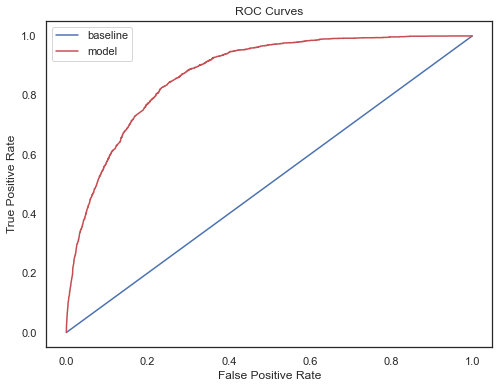

In [88]:
evaluate_model(predictions_rf,probs,train_predictions,train_probs)

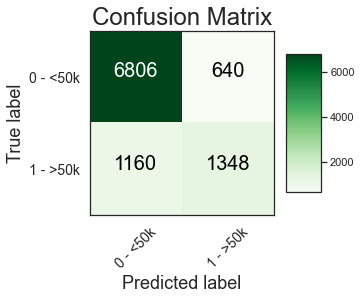

In [89]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
             plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, predictions_rf)
plot_confusion_matrix(cm, classes = ['0 - <50k', '1 - >50k'],
                      title = 'Confusion Matrix')

Our best model is random forest !

### Feature importance of our best model

In [91]:
feature_importances = list(zip(X_train, rf.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: marital.status                      Importance: 0.26130996699030207
Feature: education                           Importance: 0.1637834797337657
Feature: hours.per.week                      Importance: 0.16266523761291332
Feature: occupation                          Importance: 0.1590360306565465
Feature: relationship                        Importance: 0.13494730704674243
Feature: workclass                           Importance: 0.06003676090466358
Feature: sex                                 Importance: 0.035905839463932984
Feature: race                                Importance: 0.022315377591133445


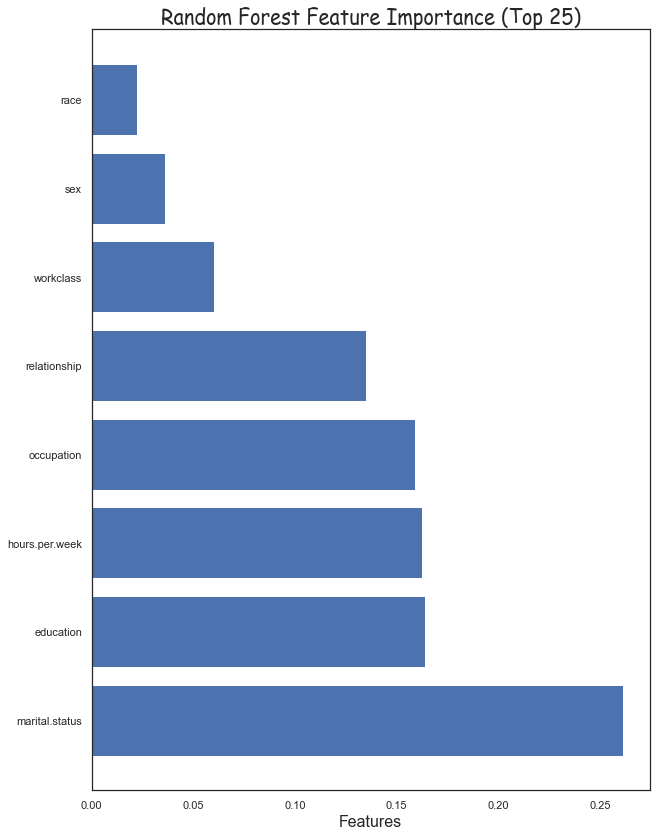

In [95]:
feature_names_8 = [i[0] for i in feature_importances_ranked[:8]]
y_ticks = np.arange(0, len(feature_names_8))
x_axis = [i[1] for i in feature_importances_ranked[:8]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_8, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

## Conclusion

As we said previously, we are more likely to have a salary above 50k if we are married and wife, and if we have a high level of education.

#### END